In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train1x5 = pd.read_csv('dataset/train1x5.csv')
test1x5 = pd.read_csv('dataset/test1x5.csv')

x_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

x_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

In [4]:
y_train = y_train.replace({5: -1})

In [5]:
#transformando em vetor para poder aplicar metodos
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.T
x_test = x_test.T
y_test = y_test.reshape(1, -1)
y_train = y_train.reshape(1, -1)

In [6]:
x_train

array([[ 44.70588235,  59.85490196,  48.55686275, ..., 110.74509804,
         99.3254902 , 101.19215686],
       [ 69.27058824,  83.44313725,  79.04313725, ..., 133.01960784,
        132.13333333, 141.36470588]])

In [7]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2, 1184)
Shape of y_train :  (1, 1184)
Shape of x_test :  (2, 583)
Shape of y_test :  (1, 583)


## Regressão Logistica:

### Equações:

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ .........inicializada com zeros

$ B = peso/parâmetro \: unico:\:Bias$ 

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$

A = $\sigma ( W^T*X + b ) $    ........ (probabilidades preditas (1 x m ) )


### Função sigmoide:

$$
y(s) = \frac{1}{1 + e^{-y_s}} = \frac{e^{y_s}}{1+e^{y_s}}
$$

### Log-verossimilhança / Log Loss / Entropia Cruzada Binária (custo):

$$
J(θ) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_θ(x^{(i)})) \right]
$$

### Gradiente:

$$
∇J(θ) = \frac{1}{m} X^T \left(h_θ(X) - y\right)
$$

In [8]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

In [9]:
def acuracia(y, pred, conjunto):

    total = len(y[0])

    acertos = 0

    for i in range(total):
        if pred[0][i] == y[0][i]:
            acertos += 1
    
    print(f"Acuracia do modelo no conjunto {conjunto}: ", (acertos/total)*100, "%")

In [10]:
def regressao_logistica(X, Y, titulo, learning_rate = 0.0015, iterations = 100000):
    
    #numero de amostras
    m = x_train.shape[1]
    
    #numero de features
    n = x_train.shape[0]
    
    #matriz de pesos
    W = np.zeros((n,1))

    #bias
    B = 0
    
    cost_list = []

    print(f'para o conjunto de {titulo}')
    print('')
    
    for i in range(iterations):
        
        #forward propagation
        Z = np.dot(W.T, X) + B

        #sigmoid
        A = sigmoide(Z)

        #custo
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        #gradiente descendente
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - learning_rate*dW.T
        B = B - learning_rate*dB
        
        #historico de custo
        cost_list.append(cost)
        

        if(i%(iterations/10) == 0):
            print(f"custo depois de {i} iterações:", cost)


    print('')
    #predições    
    Z_final = np.dot(W.T, X) + B
    A_final = sigmoide(Z_final)
    
    y_pred = np.where(A_final >= 0.5, 1, 0)

    return W, B, cost_list, y_pred
        

In [11]:
W, B, hist_custo, y_pred_treino = regressao_logistica(x_train, y_train, 'treino')

W_test, B_test, hist_custo_test, y_pred_teste = regressao_logistica(x_test, y_test, 'teste')

para o conjunto de treino

custo depois de 0 iterações: 0.6931471805599453


C:\Users\kamil\AppData\Local\Temp\ipykernel_12200\317428760.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))
C:\Users\kamil\AppData\Local\Temp\ipykernel_12200\2522365821.py:29: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


custo depois de 10000 iterações: nan
custo depois de 20000 iterações: nan


KeyboardInterrupt: 

### Vizualização Gráfica

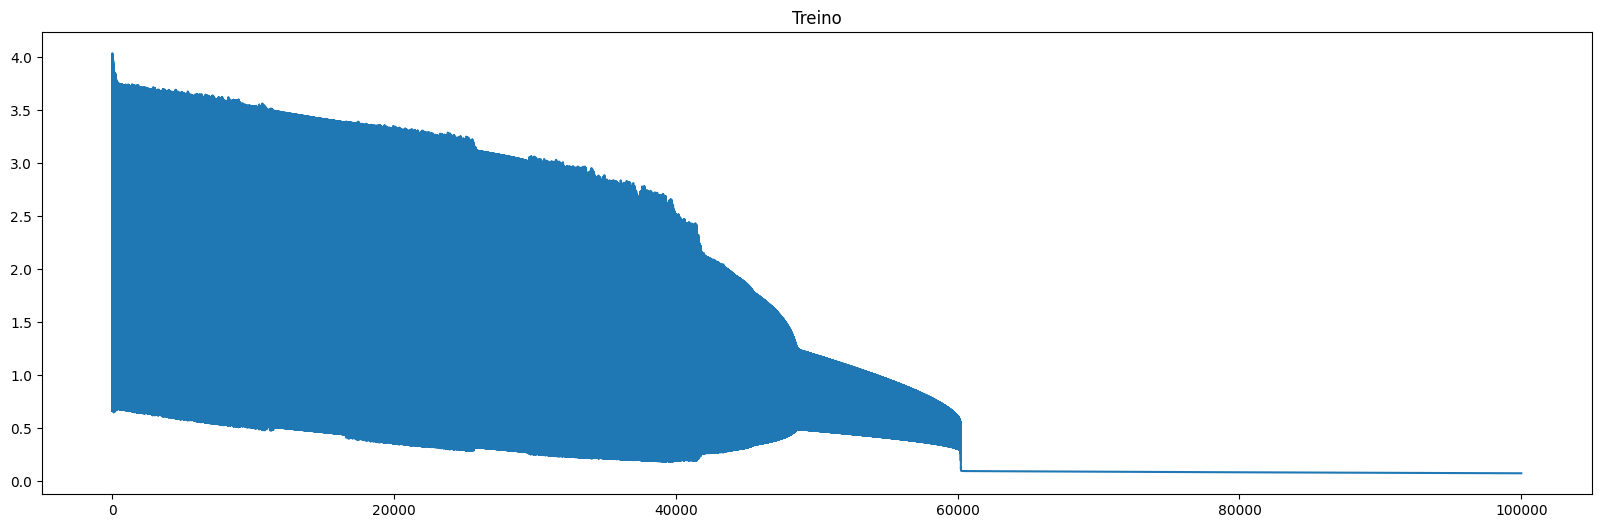

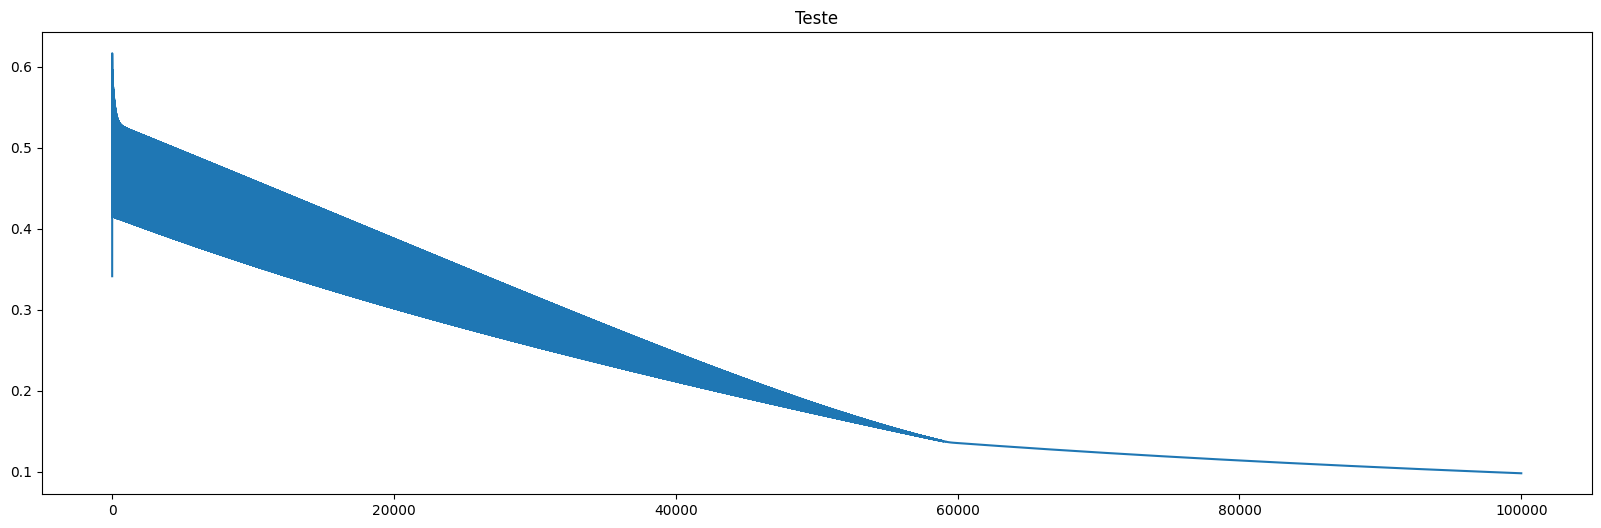

In [ ]:
iteracoes = 100000

plt.figure(figsize=(20,6))
plt.title('Treino')
plt.plot(np.arange(iteracoes), hist_custo)
plt.show()

plt.figure(figsize=(20,6))
plt.title('Teste')
plt.plot(np.arange(iteracoes), hist_custo_test)
plt.show()

In [ ]:
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_test == 1))

608
291


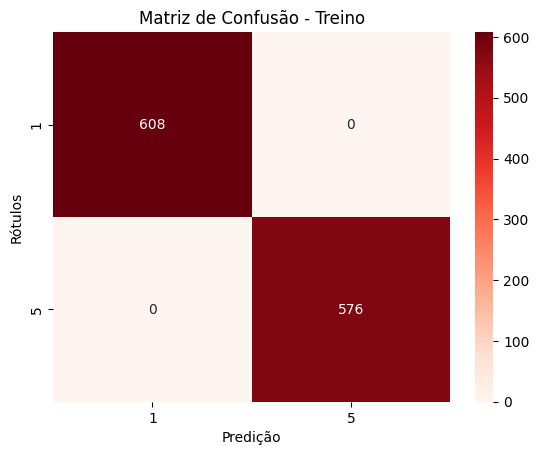

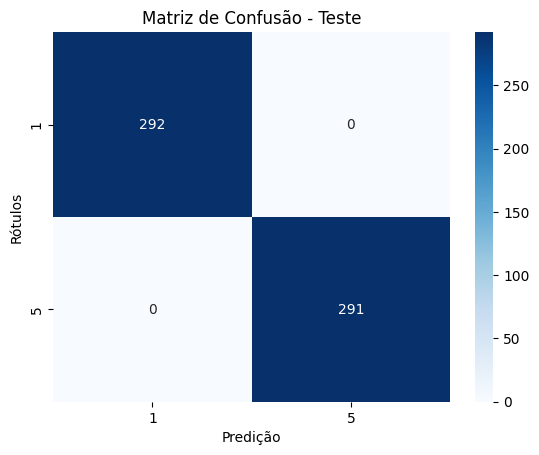

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#convertendo em vetores 1D
y_train_f = y_train.flatten()
y_pred_treino_f = y_pred_treino.flatten()

y_test_f = y_test.flatten()
y_pred_teste_f = y_pred_teste.flatten()

cm = confusion_matrix(y_train_f, y_pred_treino_f)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Treino')
plt.show()

cm_test = confusion_matrix(y_test_f, y_pred_teste_f)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['1', '5'], 
            yticklabels=['1', '5'])
plt.xlabel('Predição')
plt.ylabel('Rótulos')
plt.title('Matriz de Confusão - Teste')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184



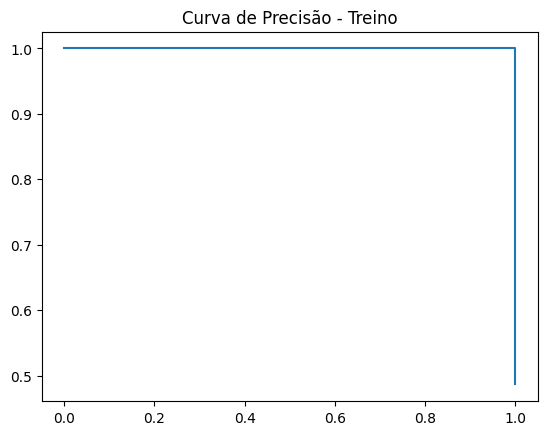

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



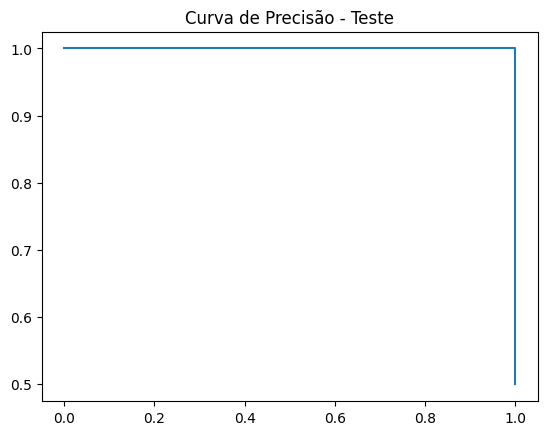

In [ ]:
from sklearn.metrics import precision_recall_curve, classification_report

report = classification_report(y_train_f, y_pred_treino_f)
#precisão x sensibilidade*
precision, recall, _ = precision_recall_curve(y_train_f, y_pred_treino_f)

print(report)

plt.plot(recall, precision)
plt.title('Curva de Precisão - Treino')
plt.show()



report_test = classification_report(y_test_f, y_pred_teste_f)

precision_test, recall_test, _ = precision_recall_curve(y_test_f, y_pred_teste_f)

print(report_test)

plt.plot(recall_test, precision_test)
plt.title('Curva de Precisão - Teste')
plt.show()

### Eficiência da Classificação

In [ ]:
acuracia(y_train, y_pred_treino, "teste")

acuracia(y_test, y_pred_teste, "treino")

Acuracia do modelo no conjunto teste:  100.0 %
Acuracia do modelo no conjunto treino:  100.0 %


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Metricas de Erro - Treino')
print("Erro médio quadrático: ", mean_squared_error(y_train, y_pred_treino))
print("Erro médio absoluto: ", mean_absolute_error(y_train, y_pred_treino))

print('')
print('Metricas de Erro - Teste')
print("Erro médio quadrático: ", mean_squared_error(y_test, y_pred_teste))
print("Erro médio absoluto: ", mean_absolute_error(y_test, y_pred_teste))

Metricas de Erro - Treino
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0

Metricas de Erro - Teste
Erro médio quadrático:  0.0
Erro médio absoluto:  0.0
